# Preparing data for classificators 

In [1]:
# We import the data and add columns
import pandas as pd
import pandas as pd
col_names=['Sex',"Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Rings"]
df = pd.read_csv(r'C:\Users\User\Desktop\Masters 1\MIIAD PROJECT\abalone',names=col_names)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
# We group all our data by Sex column and we sort by their mean of Rings
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']].mean().sort_values('Rings')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304


In [3]:
# Our categorical feature is Sex. We normalize it by making it a numerical feature
df['Male'] = (df.Sex == 'M') * 1
df['Female'] = (df.Sex == 'F') * 1
df['Immature'] = (df.Sex == 'I') * 1
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,Immature
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


In [4]:
#Now that we added new seperated columns for Sex, we can take it off(drop)  and let only M,I,F
df.drop('Sex', axis=1, inplace=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,Immature
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


In [5]:
# We see that all our type of feature are float and int
df.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Male                int32
Female              int32
Immature            int32
dtype: object

In [6]:
#Garbage in , garbage out - Check if we have any missing values in the dataset. If yes - they perofrm in model accuracy and we need to through them .
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Male              0
Female            0
Immature          0
dtype: int64

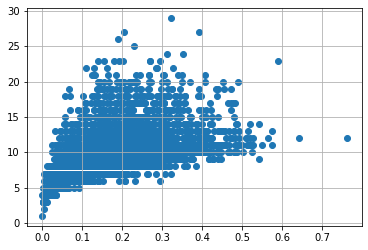

In [7]:
#We build the graph for Viscera Weight depending on its rings)
import matplotlib.pyplot as plt

var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Rings'],)
plt.grid(True)

In [8]:
# We remove the outliers that dont give us any information
df.drop(df[(df['Viscera weight']>0.5)& (df['Rings']<20)].index,inplace=True)
df.drop(df[(df['Viscera weight']<0.5)& (df['Rings']>20)].index,inplace=True)


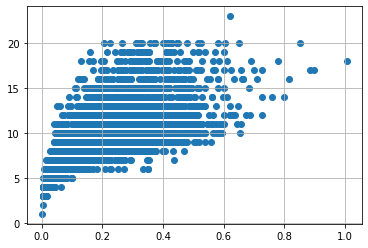

In [9]:
# We build graph for Shell weight and Rings to see how they depend on each other. 
var='Shell weight'
plt.scatter(x=df[var],y=df['Rings'],)
plt.grid(True)

In [10]:
# We remove the outliers that dont give us any useful information
df.drop(df[(df['Shell weight']>0.6) & (df['Rings']<20)].index,inplace=True)
df.drop(df[(df['Shell weight']<0.6) & (df['Rings']>20)].index,inplace=True)

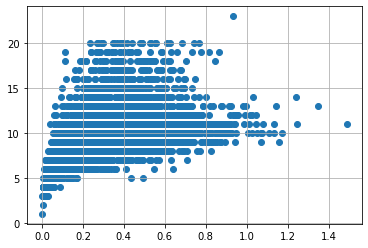

In [11]:
# We build also graph for Shucked Weight and Rings
var='Shucked weight'
plt.scatter(x=df[var],y=df['Rings'])
plt.grid(True)

In [12]:
# We remove outliers with no useful information
df.drop(df[(df['Shucked weight']>=1.0) & (df['Rings']<20)].index,inplace=True)
df.drop(df[(df['Shucked weight']<1.0) & (df['Rings']>20)].index,inplace=True)

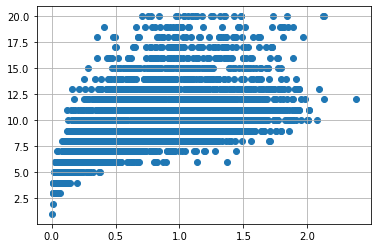

In [13]:
# We build graph of Whole weight and Rings
var='Whole weight'
plt.scatter(x=df[var],y=df['Rings'])
plt.grid(True)

In [14]:
# We remove outliers that are not so useful
df.drop(df[(df['Whole weight']>=2.0) & (df['Rings']<20)].index,inplace=True)
df.drop(df[(df['Whole weight']<2.0) & (df['Rings']>20)].index,inplace=True)

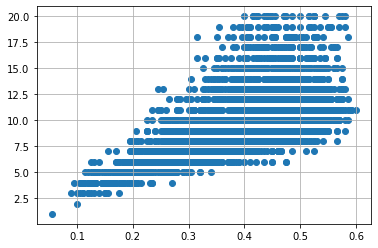

In [15]:
# We build the graph of Diameter and Rings
var = 'Diameter'
plt.scatter(x = df[var], y = df['Rings'],)
plt.grid(True)

In [16]:
# We drop the data which we dont find useful
df.drop(df[(df['Diameter']<0.1) & (df['Rings']<2.5)].index,inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['Rings']>20)].index,inplace=True)

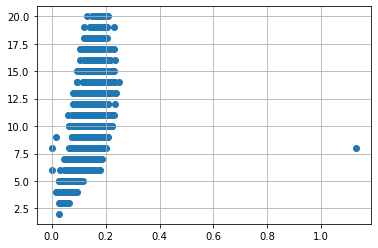

In [17]:
# We build graph for height and Rings
var = 'Height'
plt.scatter(x = df[var], y = df['Rings'],)
plt.grid(True)

In [18]:
# We remove unuseful outliers
df.drop(df[(df['Height']>0.4) & (df['Rings']<9.5)].index,inplace=True)
df.drop(df[(df['Diameter']<1.0) & (df['Rings']>9.5)].index,inplace=True)

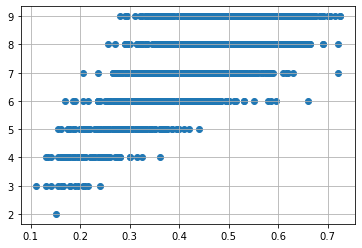

In [19]:
# We build graph of Length and Rings
var = 'Length'
plt.scatter(x = df[var], y = df['Rings'],)
plt.grid(True)

In [20]:
# We drop the value of Outliers which are not useful
df.drop(df[(df['Length']<0.3) & (df['Rings']<8.2)].index,inplace=True)
df.drop(df[(df['Length']<0.8) & (df['Rings']>9.0)].index,inplace=True)


In [21]:
# We count the value of each ring and we see that some rings give us not too many information
df['Rings'].value_counts()

9    686
8    560
7    373
6    216
5     43
4      5
Name: Rings, dtype: int64

In [22]:
# We remove the data that may not be useful
to_delete = [4,5,6]

In [23]:

for i in to_delete:
    df = df.drop(df[(df.Rings == i)].index)

In [24]:
#Now we can see that we have only 4 Rings to predict
df['Rings'].value_counts()

9    686
8    560
7    373
Name: Rings, dtype: int64

In [25]:
# Before going to classification models, we do a normalization of data by adding train_test_split
# Y is our variable that we want to predict, so we define it as y, and all the rest of the feature of dataset is our X
from sklearn.model_selection import train_test_split

X = df.drop('Rings', axis = 1).values
y = df['Rings'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35)

# Classification models

## Model №1: SVM

In [26]:
#Our first model is Support Vector Machine (SVM)
#We will perform the Grid Search algorithm(hyperparameter tuning) and see how it can be used to automatically select the best parameters for an algorithm.
#we gave params to the test, C(C is the cost of misclassification as correctly) and gamma (Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification) 
#and Grid Search gave us the best params.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
param_test1 = {
 'C':[0.01, 0.1, 0.5, 1., 2., 5, 10], 
 'gamma':[0.01, 0.1, 0.5, 1., 2., 5, 10]
}
gsearch1 = GridSearchCV(estimator = SVC(), 
                        param_grid = param_test1, scoring = 'f1_macro',
                        n_jobs=-1, iid=False, cv=10, verbose=2)
gsearch1.fit(X, y)
gsearch1.best_params_, gsearch1.best_score_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   57.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'C': 1.0, 'gamma': 10}, 0.5337704836165706)

In [27]:
%%time
# We can after build the Classification report table that give us the values of Rings with their corresponding precision recall and f1_score . 
# We take also the corresponding values of Training score and testing score and the MSE.
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svc=SVC(gamma=10,C=1.0)
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Classification Report: \n', classification_report(Y_test, Y_pred))

svc_train_acc = svc.score(X_train, Y_train) 
print('Training Score: ', svc_train_acc)

svc_test_acc = svc.score(X_test, Y_test)
print('Testing Score: ', svc_test_acc)
error = MSE(Y_test, Y_pred)

print("MSE:", error)

Classification Report: 
               precision    recall  f1-score   support

           7       0.56      0.51      0.53       140
           8       0.44      0.38      0.41       185
           9       0.63      0.74      0.68       242

    accuracy                           0.56       567
   macro avg       0.54      0.54      0.54       567
weighted avg       0.55      0.56      0.55       567

Training Score:  0.5741444866920152
Testing Score:  0.562610229276896
MSE: 0.6649029982363316
Wall time: 241 ms


## Model №2: RandomForestClassifier

In [28]:
# Our second model is Random Forest Classifier. We use Grid search algorithm again to find the best params for our model .
#We take as paramters : n_estimators(The number of trees in the forest) and max_depth(The maximum depth of the tree).
#n_jobs(The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees.-1 means using all processors.
from sklearn.ensemble import RandomForestClassifier

param_test2 = {
 'n_estimators':[10, 50, 100, 150, 250, 400], 
 'max_depth': [3, 4, 5, 6, 7, 8, 9]
}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = param_test2, scoring = 'f1_macro',
                        n_jobs=-1, iid=False, cv=10, verbose=2)
gsearch2.fit(X, y)
gsearch2.best_params_, gsearch2.best_score_


Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  3.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 3, 'n_estimators': 10}, 0.5386909059783622)

In [29]:
%%time
# We can use again the classification report table and use the parameters that rid search values as the best.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_depth=3)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

print('Classification Report: \n', classification_report(Y_test, Y_pred))

rf_train_acc = rf.score(X_train, Y_train) 
print('Training Score: ', rf_train_acc)

rf_test_acc = rf.score(X_test, Y_test)
print('Testing Score: ', rf_test_acc)
error = MSE(Y_test, Y_pred)

print("MSE:", error)

Classification Report: 
               precision    recall  f1-score   support

           7       0.57      0.49      0.53       140
           8       0.42      0.35      0.38       185
           9       0.61      0.74      0.67       242

    accuracy                           0.55       567
   macro avg       0.53      0.53      0.53       567
weighted avg       0.54      0.55      0.54       567

Training Score:  0.5884030418250951
Testing Score:  0.5502645502645502
MSE: 0.6931216931216931
Wall time: 75 ms


## Model №3: GradBoost

In [30]:
# Our third model is GradBoosting. We use the Grid search for hyperparameter tuning 
#n_estimators(The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.)
#max_depth(maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree)
#learning_rate(learning rate shrinks the contribution of each tree by learning_rate)
from sklearn.ensemble import GradientBoostingClassifier

param_test3 = {
 'n_estimators':[10, 50, 100, 150, 250, 400], 
 'max_depth': [3, 4, 5, 6, 7, 8, 9],
 'learning_rate': [0.001, 0.01, 0.1, 1, 2]
}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(), 
                        param_grid = param_test3, scoring = 'f1_macro',
                        n_jobs=-1, iid=False, cv=10, verbose=2)
gsearch3.fit(X, y)
gsearch3.best_params_, gsearch3.best_score_

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 61.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 86.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 113.0min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 117.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400},
 0.5320544160621445)

In [31]:
%%time
#We create the classification report table of y_test, y_pred and get the precision,recall,f1_score for each of our Rings.
#We can also check the Training and Testing score.
rf=GradientBoostingClassifier(n_estimators=400, max_depth=3, learning_rate=0.01)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

print('Classification Report: \n', classification_report(Y_test, Y_pred))

rf_train_acc = rf.score(X_train, Y_train) 
print('Training Score: ', rf_train_acc)

rf_test_acc = rf.score(X_test, Y_test)
print('Testing Score: ', rf_test_acc)
error = MSE(Y_test, Y_pred)

print("MSE:", error)

Classification Report: 
               precision    recall  f1-score   support

           7       0.59      0.53      0.56       140
           8       0.36      0.34      0.35       185
           9       0.60      0.67      0.63       242

    accuracy                           0.53       567
   macro avg       0.52      0.51      0.51       567
weighted avg       0.52      0.53      0.52       567

Training Score:  0.6977186311787072
Testing Score:  0.5255731922398589
MSE: 0.6649029982363316
Wall time: 3.72 s


## Model №4: KNN



In [32]:
#Our 4 model is KNN . we build again the grid seach model to find the best parameters.
#n_neigbors(Number of neighbors to use by default for kneighbors queries.)
#metric(the distance metric to use for the tree.)
#weights(weight function used in prediction. 1-uniform,2-distance)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
param_test4 ={'n_neighbors': ([5, 6, 7, 8, 9]), 
              'metric': ['minkowski', 'euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}
gsearch4 = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_test4, scoring = 'f1_macro',
                        n_jobs=-1, iid=False, cv=10, verbose=2)
gsearch4.fit(X, y)
gsearch4.best_params_, gsearch4.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'},
 0.5145910538232238)

In [33]:
%%time
# We build the knn model and find results using classification report
from sklearn.metrics import classification_report

knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=8, p=2, weights='uniform')
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

print('Classification Report: \n', classification_report(Y_test, Y_pred))

knn_train_acc = knn.score(X_train, Y_train) 
print('Training Score: ', knn_train_acc)

knn_test_acc = knn.score(X_test, Y_test)
print('Testing Score: ', knn_test_acc)

error = MSE(Y_test, Y_pred)

print("MSE:", error)

Classification Report: 
               precision    recall  f1-score   support

           7       0.51      0.61      0.56       140
           8       0.39      0.38      0.39       185
           9       0.61      0.55      0.58       242

    accuracy                           0.51       567
   macro avg       0.50      0.51      0.51       567
weighted avg       0.51      0.51      0.51       567

Training Score:  0.6169201520912547
Testing Score:  0.5114638447971781
MSE: 0.7689594356261023
Wall time: 165 ms


In [37]:
headers = ['Model', "Training_Score", "Testing_Score",
          "MSE","Wall_time(Lenovo_Thinkpad(i5-5300U))"]

tabledata = [["SVM", 0.57, 0.56, 0.66, "241 ms"], 
            ["RandomForestClassifier", 0.58, 0.55,  0.69, "75 ms"],
            ["GradientBoosting",0.69 ,0.52,0.66, "3.72 s" ],
            ["KNN", 0.61, 0.51, 0.76 ,"165 ms"]]

In [50]:

from IPython.display import HTML, display

def dataToTable(data, columns = None):
    if len(data) == 0 :  
        display(HTML('<b>Нет данных</b>'))
        return
    
    hdr = ''
    if columns != None:
        for col in columns:
            hdr = hdr + '<th>' + col + '</th>'
            
        hdr = '<tr>' + hdr + '</tr>'

    dt = ''
    for row in data: 
        dt = dt + '<tr>'
        for cell in row: 
            dt = dt + '<td>' + str(cell) + '</td>'
        dt = dt + '</tr>'
            
    display(HTML('<table>' + hdr + dt + '</table>'))

In [51]:
dataToTable(tabledata, headers)

Model,Training_Score,Testing_Score,MSE,Wall_time(Lenovo_Thinkpad(i5-5300U))
SVM,0.57,0.56,0.66,241 ms
RandomForestClassifier,0.58,0.55,0.69,75 ms
GradientBoosting,0.69,0.52,0.66,3.72 s
KNN,0.61,0.51,0.76,165 ms


# Сравнении задач классификации и регрессии на большем количестве классов

## Подготовка данных

In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Даниил\Desktop\abalone\abalone_csv.csv')
df['Male'] = (df.Sex == 'M') * 1
df['Female'] = (df.Sex == 'F') * 1
df['Infant'] = (df.Sex == 'I') * 1
df.drop('Sex', axis=1, inplace=True)
df['Class_number_of_rings'] = df.Class_number_of_rings * 1.

Здесь удаляем лишь наиболее редковстречающиеся классы

In [ ]:
to_delete = [29, 26, 2, 25, 1, 27, 24, 22, 23]

for i in to_delete:
    df = df.drop(df[(df.Class_number_of_rings == i)].index)
df['Class_number_of_rings'].value_counts()

Разделяем датасет на тренировочную и тестовую выборку и нормализируем признаки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('Class_number_of_rings', axis = 1).values
Y = df['Class_number_of_rings'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Линейные модели

### Классификатор

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)


lr_test_acc=lr.score(X_test,Y_test)
print('Accuracy:',lr_test_acc)

### Регрессор 

In [ ]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

l_model = LinearRegression()
l_model.fit(X_train, Y_train)
prediction = l_model.predict(X_test)
error = MSE(Y_test, prediction)

print("MSE:", error)

Посчитаем долю верных ответов на тестовой выборке, округлив предсказанные значения

In [15]:
for j, i in enumerate(prediction):
    i = round(i)
    prediction[j] = i
    
k = 0
for i in range(len(prediction)):
    if Y_test[i] == prediction[i]:
        k += 1
print("Accuracy:", k / len(prediction))

Accuracy: 0.24277854195323245


## Random Forest

### Классификатор

In [16]:
%%time

from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier(n_estimators=150,max_depth=4)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)


rf_test_acc = rf.score(X_test, Y_test)
print('Accuracy: ', rf_test_acc)

Accuracy:  0.28060522696011003
Wall time: 448 ms


### Регрессор

In [17]:
%%time 

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=150,max_depth=4)

rf.fit(X_train,Y_train)
prediction=rf.predict(X_test)
error = MSE(Y_test, prediction)
print("MSE:", error)

MSE: 4.305987310766452
Wall time: 546 ms


In [19]:
for j, i in enumerate(prediction):
    i = round(i)
    prediction[j] = i
    
k = 0
for i in range(len(prediction)):
    if Y_test[i] == prediction[i]:
        k += 1
print("Accuracy:", k / len(prediction))

Accuracy: 0.23383768913342504


## Градиентный бустинг

### Классификатор 

In [37]:
%%time

from sklearn.ensemble import GradientBoostingClassifier


gb=GradientBoostingClassifier(n_estimators=400, max_depth=4, learning_rate=0.01)
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)

gb_test_acc = gb.score(X_test, Y_test)
print('Accuracy: ', gb_test_acc)

Accuracy:  0.26478679504814306
Wall time: 23.3 s


### Регрессор

In [25]:
%%time

from sklearn.ensemble import GradientBoostingRegressor
rf=GradientBoostingRegressor(n_estimators=400, max_depth=5, learning_rate=0.01)

rf.fit(X_train,Y_train)
prediction=rf.predict(X_test)
error = MSE(Y_test, prediction)
print("MSE:", error)

MSE: 3.9578240946919103
Wall time: 1.05 s


In [26]:
for j, i in enumerate(prediction):
    i = round(i)
    prediction[j] = i
    
k = 0
for i in range(len(prediction)):
    if Y_test[i] == prediction[i]:
        k += 1
print("Accuracy:", k / len(prediction))

Accuracy: 0.25722145804676755


## Результаты:

In [38]:
headers = ['Модель', "Доля верных ответов", "Скорость обучения и тестирования (Ryzen2600)",
          "Среднеквадратичная ошибка (для регрессоров)"]

tabledata = [["LogReg", 0.268, "93.2 ms", "-"], 
            ["LinReg", 0.242, "2 ms", "4.204"],
            ["RanForClass", 0.280, "448 ms", "-"],
            ["RanForReg", 0.233, "546 ms", 4.305],
            ["GradBoostClass", 0.264, "23.3 s", "-"],
            ["GradBoostReg", 0.257, "1.05 s", 3.957]]

In [39]:
def dataToTable(data, columns = None):
    if len(data) == 0 :  
        display(HTML('<b>Нет данных</b>'))
        return
    
    hdr = ''
    if columns != None:
        for col in columns:
            hdr = hdr + '<th>' + col + '</th>'
            
        hdr = '<tr>' + hdr + '</tr>'

    dt = ''
    for row in data: 
        dt = dt + '<tr>'
        for cell in row: 
            dt = dt + '<td>' + str(cell) + '</td>'
        dt = dt + '</tr>'
            
    display(HTML('<table>' + hdr + dt + '</table>'))

In [40]:
dataToTable(tabledata, headers)

Модель,Доля верных ответов,Скорость обучения и тестирования (Ryzen2600),Среднеквадратичная ошибка (для регрессоров)
LogReg,0.268,93.2 ms,-
LinReg,0.242,2 ms,4.204
RanForClass,0.28,448 ms,-
RanForReg,0.233,546 ms,4.305
GradBoostClass,0.264,23.3 s,-
GradBoostReg,0.257,1.05 s,3.957
